In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [5]:
# reading and loading the dataset
df = pd.read_csv("climate_action_data.csv")

# initial inspection
df.head()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [7]:
#more inspection
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


Sensor_ID                        object
Date                             object
Soil_Moisture(%)                 object
Soil_pH                          object
Temperature(C)                   object
Humidity(%)                      object
Crop_Type                        object
Fertilizer_Recommended(kg/ha)    object
Irrigation_Recommended(mm)       object
Drone_Image_ID                   object
dtype: object

In [8]:
df.describe()


,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,2026-09-10,error,7.54,19.1,56.0,Wheat,66.9,8.0,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [9]:
# shape of the data frame
df.shape

(913, 10)

In [13]:
# handling bad data
# missing values
# checking for missing 
print("missing values")
df.isnull().sum()

missing values


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [26]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [27]:


# filling missing values in date with the median date
median_date = df['Date'].median()
df['Date'] = df['Date'].fillna(median_date)


# checking for missing values in Date
df['Date'].isnull().sum()


 

0

In [17]:
# for categorical columns(crop_type), we can fill missing values with the mode
categorical_cols = ["Crop_Type"]
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])  # fill NaN values with the mode of the column
        
 # Check again for missing values
print("Missing values after handling:")
print(df.isnull().sum())       


Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [18]:
# dealing with duplicates
# check for duplicates
df.duplicated().sum()

111

In [22]:
#remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])

# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())

# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# checking for number of duplicates now
df.duplicated().sum()

Number of rows after removing duplicates: 799
Number of duplicate dates: 0


0

In [30]:
# dealing with error entries in numeric columns
# # Find columns with the string 'error'
df[df == 'error'].count()

# replacing error with NaN
df.replace('error', np.nan, inplace=True)
df.isnull().sum()


Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [ ]:
columns_to_clean = [
    'Soil_Moisture(%)',
    'Soil_pH',
    'Temperature(C)',
    'Humidity(%)',
    'Fertilizer_Recommended(kg/ha)',
    'Irrigation_Recommended(mm)'
]

# Convert to numeric and fill NaNs with the median
for col in columns_to_clean:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # convert strings to numbers
    median_value = df[col].median()                    # compute median
    df[col].fillna(median_value, inplace=True)         # replace NaNs with median
    
    

C:\Users\hp\AppData\Local\Temp\ipykernel_7852\908381023.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)         # replace NaNs with median


In [35]:
df.isnull().sum()

Sensor_ID                        0
Date                             0
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [38]:
# dealing with columns with incorrect data formats
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip()
        
        
        
# Check data types after conversion
print("Data types after conversion:")   
print(df.dtypes)        


Data types after conversion:
Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object


In [39]:
# final clean data set
df.info()
# Check empty values again
print("Missing values after all cleaning:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      799 non-null    object        
 1   Date                           799 non-null    datetime64[ns]
 2   Soil_Moisture(%)               799 non-null    float64       
 3   Soil_pH                        799 non-null    float64       
 4   Temperature(C)                 799 non-null    float64       
 5   Humidity(%)                    799 non-null    float64       
 6   Crop_Type                      799 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64       
 8   Irrigation_Recommended(mm)     799 non-null    float64       
 9   Drone_Image_ID                 799 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.7+ KB
Missing values after all

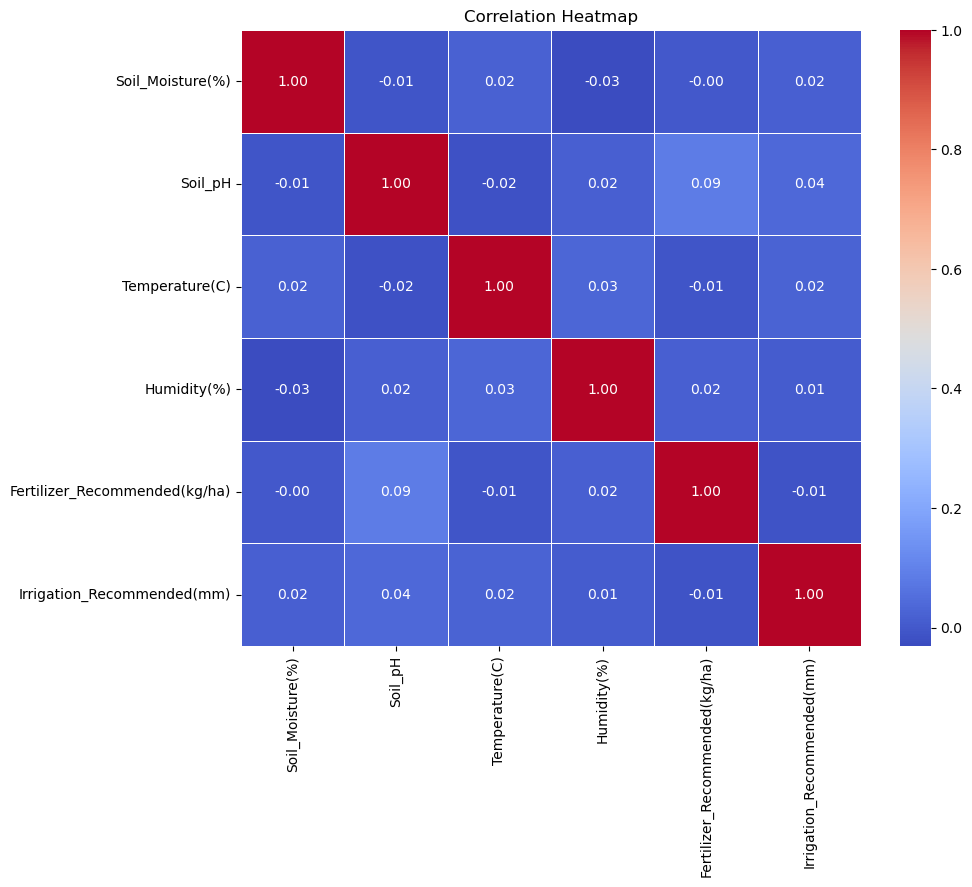

In [41]:
# Compute correlation matrix
corr = df.corr(numeric_only=True)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

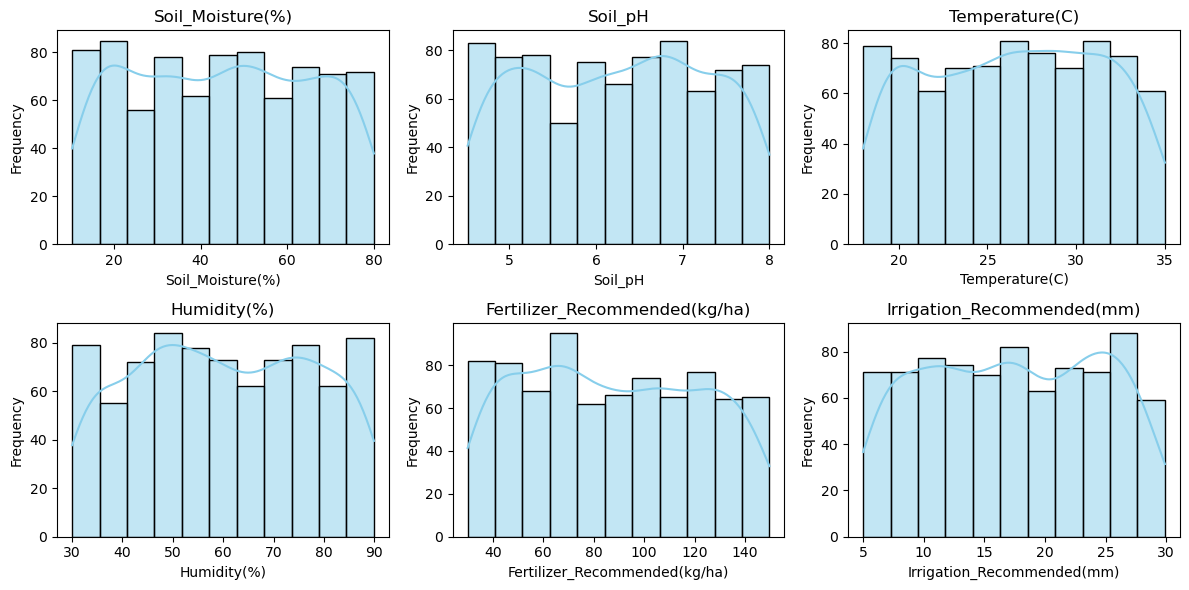

In [43]:
#Histogram


fig, axs = plt.subplots(2, 3, figsize=(12, 6))

columns = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']

axs = axs.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i], color='skyblue', edgecolor='black')
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [45]:
# Export the clean dataset
output_filename = 'cleaned_precision_agriculture_data.csv'
df.to_csv(output_filename, index=False)
print(f"\nCleaned dataset exported to {output_filename}")


Cleaned dataset exported to cleaned_precision_agriculture_data.csv


In [ ]:
# Analysis, Insights, and Recommendations:
# 1. Variables Most Influencing Fertilizer Recommendations:
# From the correlation heatmap, the variables that show the highest (though still weak) correlation with Fertilizer_Recommended(kg/ha) are:
#
# Soil pH: Shows a positive correlation of approximately 0.075, suggesting that as soil pH increases slightly, fertilizer recommendations tend to increase minimally.
# Humidity (%): Has a very weak positive correlation of approximately 0.018.
# Soil Moisture (%): Shows a very weak positive correlation of approximately 0.011.
# Temperature (C): Has an extremely weak positive correlation of approximately 0.004.
# Irrigation Recommended (mm): Shows a very weak negative correlation of approximately −0.008.
# Insight: All observed correlations with Fertilizer_Recommended(kg/ha) are very weak. This indicates that the current environmental and soil variables in this dataset do not individually have a strong linear influence on fertilizer recommendations. It is highly probable that other factors not present in this dataset (such as specific nutrient levels like Nitrogen, Phosphorus, Potassium, or crop growth stages) or more complex, non-linear interactions are at play in determining fertilizer needs.
# 2. Crop Type with the Highest Average Soil Moisture:
# The crop type with the highest average soil moisture is Wheat, with an average soil moisture of approximately 46.84%.
# Insight: Wheat appears to be cultivated in conditions that maintain higher average soil moisture levels compared to other crop types in this dataset. This could be due to specific irrigation practices, soil types, or natural rainfall patterns in the areas where wheat is grown.
# 3. Appropriate Irrigation Adjustments for Crops Experiencing Average Temperatures Above 30∘C:
# The overall average irrigation recommended across all data is approximately 17.42 mm. For crops experiencing average temperatures above 30∘C, the average recommended irrigation is slightly higher at approximately 17.74 mm.
# Insight & Recommendations:
#
# While the overall average irrigation for crops above 30∘C is only marginally higher than the dataset's average, a closer look at individual entries reveals varied recommendations. For instance, some crops at high temperatures receive high irrigation recommendations (e.g., Maize at 32.1∘C with 28.8 mm), while others receive significantly lower recommendations (e.g., Lettuce at 31.6∘C with 6.4 mm).
# Recommendation: Instead of a blanket adjustment, irrigation adjustments for crops experiencing average temperatures above 30∘C should be highly individualized. It is crucial to consider the specific Crop_Type, its current Soil_Moisture(%), and the existing Irrigation_Recommended(mm) for that particular crop under high-temperature conditions. Crops with lower Soil_Moisture(%) at high temperatures, especially those showing low Irrigation_Recommended(mm), might require increased irrigation to prevent heat and drought stress. Conversely, crops with already high soil moisture might not need significant adjustments.
# Implementing smart irrigation systems that use real-time data from soil moisture sensors and weather forecasts would be beneficial for precise and efficient water management, especially during periods of high temperatures.